In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 13, 7

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

### 데이터 설명

이 데이터는 1994년도 미국 income에 대한 데이터로 이 데이터의 목적은 50K이상을 버는 사람과 아닌 사람을 분류할 목적으로 만들어진 데이터


- age: 나이
- workclass: 고용 형태
- fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
- education: 교육 수준
- education.num: 교육 수준 수치
- marital.status: 결혼 상태
- occupation: 업종
- relationship: 가족 관계
- race: 인종
- sex: 성별
- capital.gain: 양도 소득
- capital.loss: 양도 손실
- hours.per.week: 주당 근무 시간
- native.country: 국적
- income: 수익 (예측해야 하는 값)

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [4]:
columns  = ['age','workclass','fnlwgt','education','edu_num','marital.status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours-per-week','native_country','income']

In [5]:
df.columns = columns

df

,age,workclass,fnlwgt,education,edu_num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### EDA

#### 진행과정
1. 결측값 확인 및 제외
2. 각 항목 별 분포 파악
3. 2 과정을 통해 불필요하다고 판단된 항목 제외 및 새로운 항목 생성
4. 범주형 항목 LabelEncoder로 변환

#### 1. 결측값 확인 및 제외

In [6]:
df[df == ' ?'] = np.nan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   edu_num         32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
edu_num              0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours-per-week       0
native_country     583
income               0
dtype: int64

In [9]:
# 최빈값으로 대체
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### 2. 각 항목 별 분포 확인

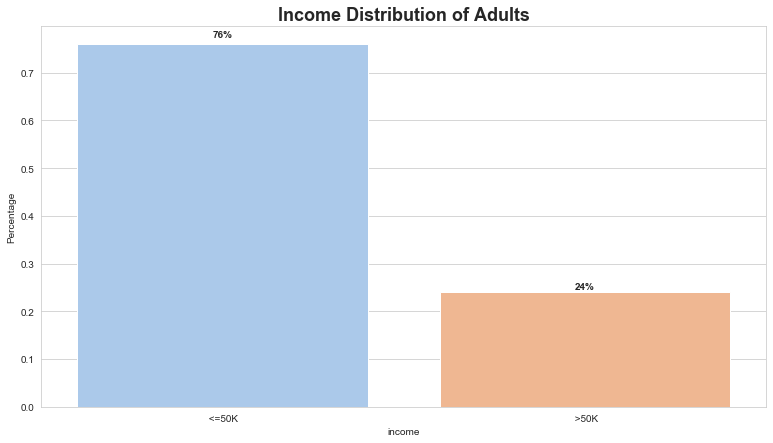

In [10]:
# 전체 데이터 중 목표값 비율
sns.set_style("whitegrid")
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='pastel')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [11]:
# 연령대 별
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

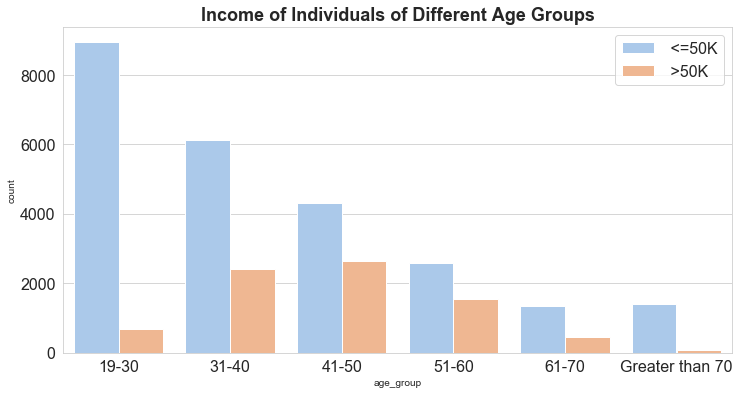

In [12]:
# 연령대 별 income 분포
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='pastel', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

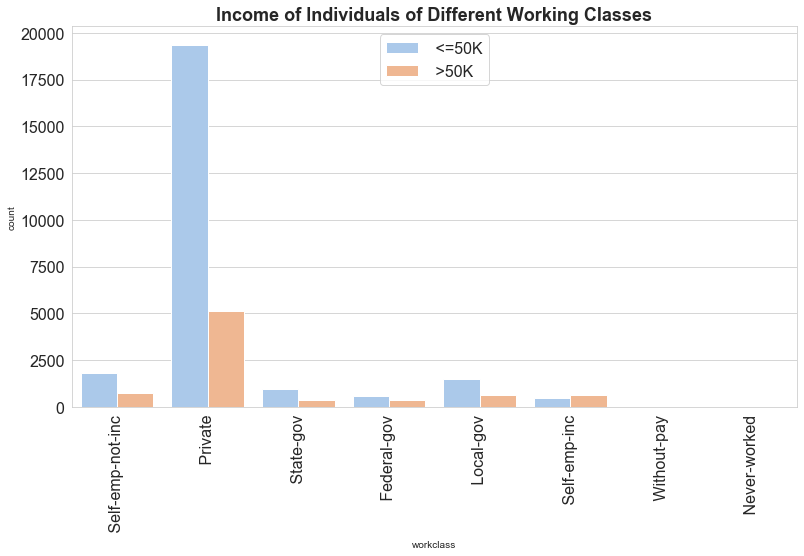

In [13]:
# 고용형태 별 분포
sns.countplot(df['workclass'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

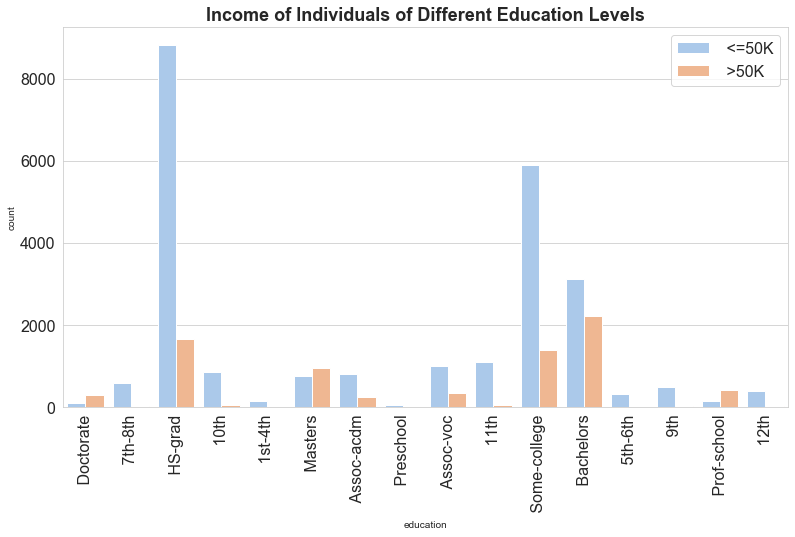

In [14]:
# 교육 수준 별
t = set(df['education'])
order_edu = list(t)

sns.countplot(df['education'], hue = df['income'], palette='pastel', order= order_edu)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

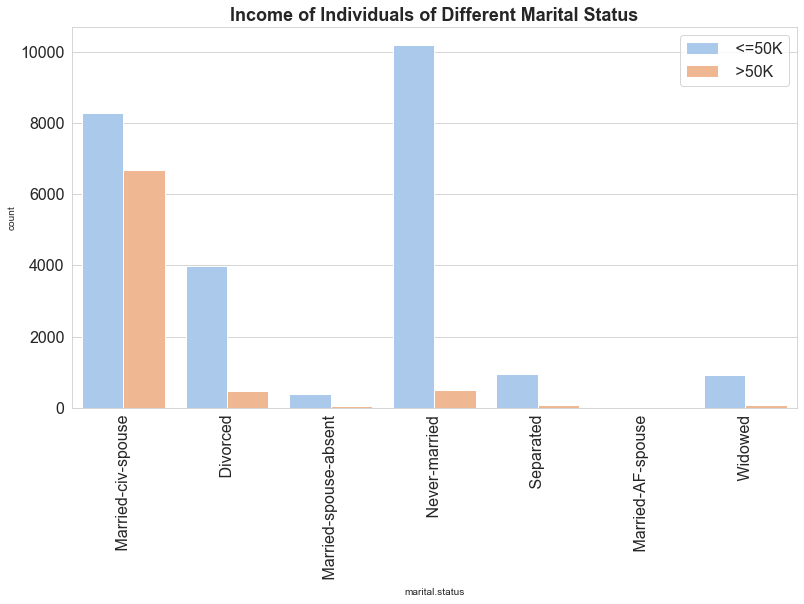

In [15]:
# 결혼 상태
sns.countplot(df['marital.status'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

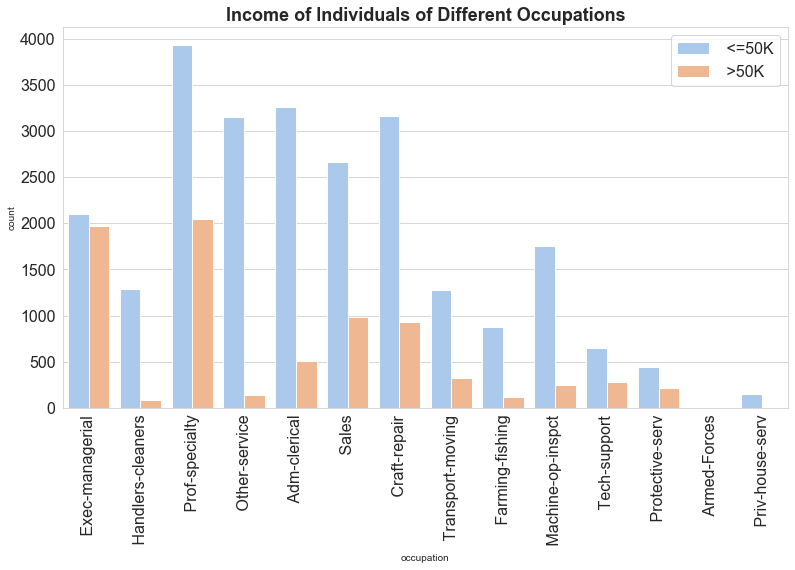

In [16]:
sns.countplot(df['occupation'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

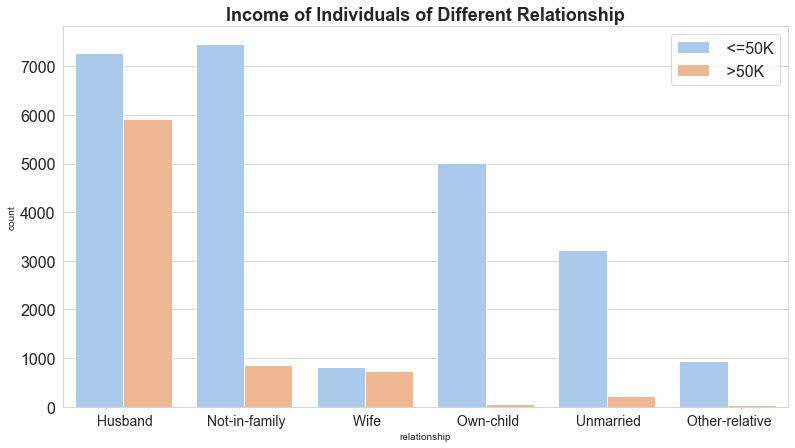

In [17]:
sns.countplot(df['relationship'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

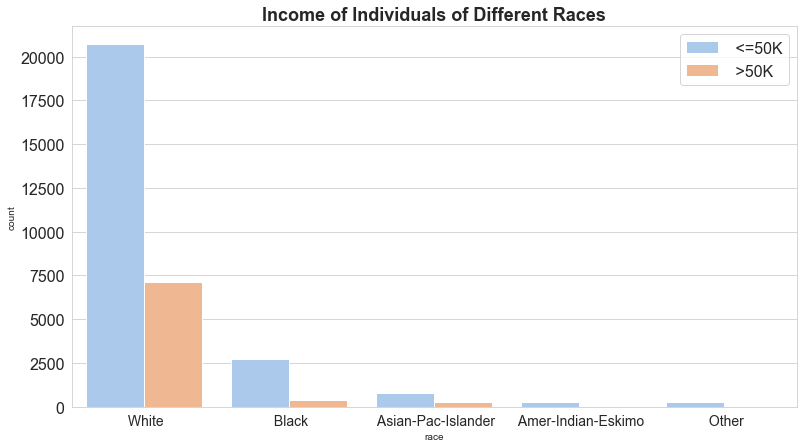

In [18]:
sns.countplot(df['race'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

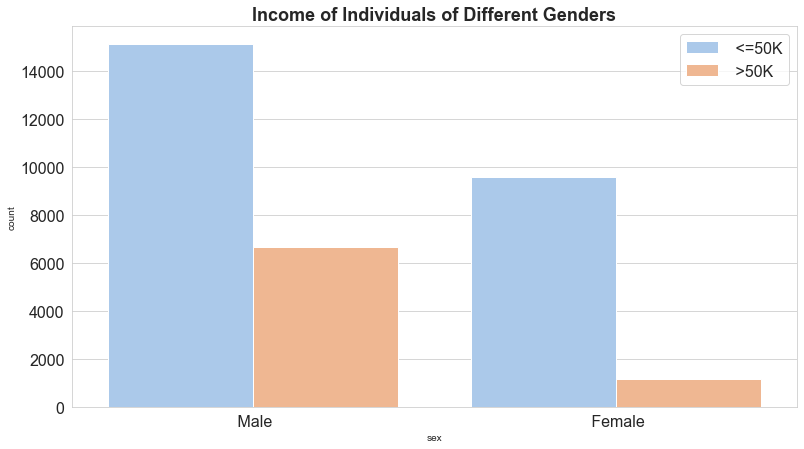

In [19]:
sns.countplot(df['sex'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

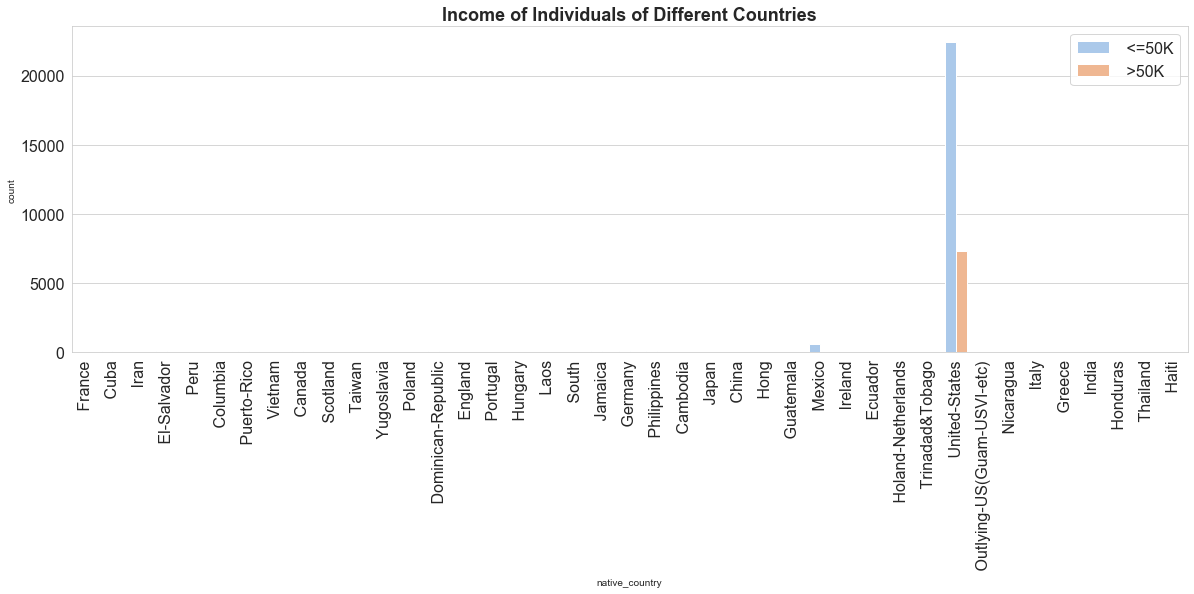

In [20]:
t = set(df['native_country'])
order_countries = list(t)

plt.figure(figsize=(20,6))
sns.countplot(df['native_country'], hue = df['income'], palette='pastel', order=order_countries)
plt.title('Income of Individuals of Different Countries', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 <a list of 8 Text yticklabel objects>)

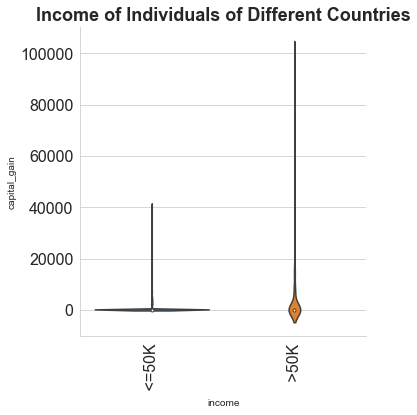

In [21]:
sns.catplot(x='income', y='capital_gain', kind='violin',data=df)
plt.title('Income of Individuals of Different Countries', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text yticklabel objects>)

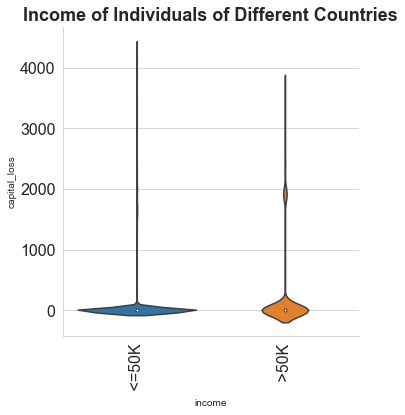

In [22]:
sns.catplot(x='income', y='capital_loss', kind='violin',data=df)
plt.title('Income of Individuals of Different Countries', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

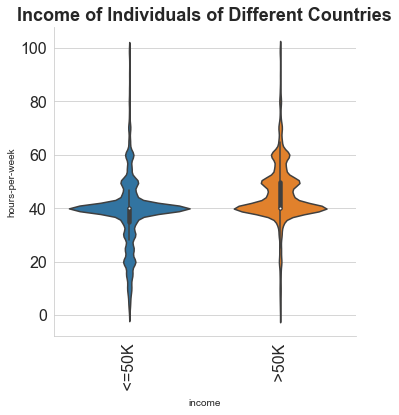

In [23]:
sns.catplot(x='income', y='hours-per-week', kind='violin',data=df)
plt.title('Income of Individuals of Different Countries', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)

#### 3. 항목 별 변경

- 제외할 칼럼: workclass, race, native_country
- 칼럼 값 변경 : education, marital.status

In [24]:
## drop columns
df.drop(['workclass','race','native_country', 'edu_num', 'age_group'], axis=1, inplace=True)

In [25]:
## change values
# education: pre-school ~ 12th  -> not-Hs_grad
changed_columns = [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th']
df['education'].replace(changed_columns, 'Not-Hs_grad', inplace=True)

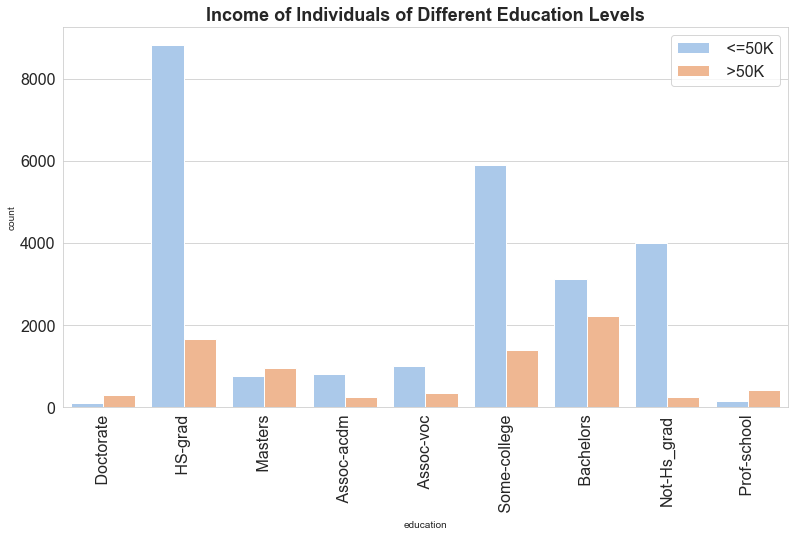

In [26]:
t = set(df['education'])
order_edu = list(t)

sns.countplot(df['education'], hue = df['income'], palette='pastel', order= order_edu)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [27]:
df

,age,fnlwgt,education,marital.status,occupation,relationship,sex,capital_gain,capital_loss,hours-per-week,income
0,50,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,<=50K
1,38,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
2,53,234721,Not-Hs_grad,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,<=50K
3,28,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,<=50K
4,37,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,<=50K
32556,40,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,>50K
32557,58,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,<=50K
32558,22,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,<=50K


In [28]:
# marital.status : except never-married & married -> seperated
changed_columns = [' Divorced', ' Married-spouse-absent',' Widowed',' Married-AF-spouse']
df['marital.status'].replace(changed_columns, ' Separated', inplace=True)

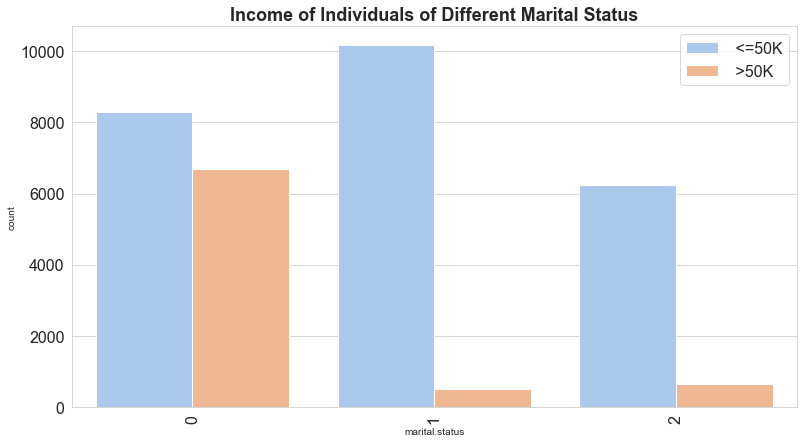

In [38]:
sns.countplot(df['marital.status'], hue = df['income'], palette='pastel')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### numeric 변수간의 Correlation

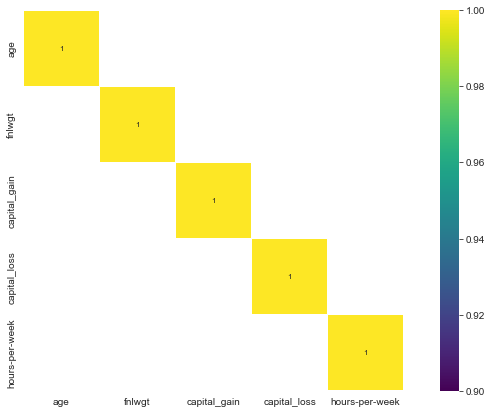

In [30]:
corr = df.corr()

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap = 'viridis', vmax = 0.9, linewidth = 0.1, annot = True, annot_kws = {'size': 8}, square = True)

### save to csv

In [41]:
df.to_csv("./df_uci_adult.csv", header=True, index=None)

### Reference

https://www.kaggle.com/datasets/uciml/adult-census-income/code

https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch